In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!ls "/content/drive/MyDrive"


'10th mark sheet.jpg'
 2783f616-756e-4a85-975f-4965cc426c43.jpeg
 2856204537811401_healthCard.pdf
 a606ecba-fbc9-4586-83b5-4f4560654297.jpeg
'addmission letter.pdf'
'all sem mark sheet.pdf'
 asdd
 blog_db.zip
 Chaal.Jeevi.Laiye.2019-1080p.HEVC.Gujrati.WEB-DL.5.1.HC-ESub.x265-HDHub4u.Tv.mkv
 CICIDS2017.csv
 Classroom
'Colab Notebooks'
 con_paper_on_diabetic_retinopathey.pdf
'Copy of Academic Calendar of Second Year (Odd Semester) of FEST AY 2023-24.pdf'
 dec12_18features.csv
'Devarsh wedding'
 ews.pdf
'Google Earth'
 iLovePDF
'income certifecate.pdf'
 insurance.pdf
'Ipad bill.pdf'
'malav adhar fb (1).pdf'
'malav adhar fb.pdf'
'malav chutani card.pdf'
 malav_dl.pdf
 malav_ind_licese.pdf
'malav LC.pdf'
'malav pan (1).pdf'
'malav pan.pdf'
'malav scooter policy.pdf'
'pasportsize img.jpg'
'Project backup'
 project.zip
'provisional certe.jpg'
'P.S tutorial 1.pdf'
'P.S tutorial 2.pdf'
'P.S tutorial 3.pdf'
'P.S tutorial 4.pdf'
'Special Offer Bonuses '
'Workshop Bonuses '


In [6]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dec12_18features.csv")
df.head()

,eventID,eventTime,sourceIPAddress,userAgent,eventName,eventSource,awsRegion,eventVersion,userIdentitytype,eventType,userIdentityaccountId,userIdentityprincipalId,userIdentityarn,userIdentityaccessKeyId,userIdentityuserName,errorCode,errorMessage,requestParametersinstanceType
0,3038ebd2-c98a-4c65-9b6e-e22506292313,2017-02,255.253,[S3Console,ListBuckets,s3.amazonaws.com,us-east-1,1.04,Root,AwsApiCall,811596193553.0,811596193553,arn:aws:iam::811596193553:root,Unknown,Unknown,NaN,NoError,NotApplicable
1,22a0d9b1-deea-4d39-827b-2af7050ed3f3,2017-02,255.253,console.amazonaws.com,GetAccountPasswordPolicy,iam.amazonaws.com,us-east-1,1.02,Root,AwsApiCall,811596193553.0,811596193553,arn:aws:iam::811596193553:root,ASIA79EXPHZ8SRL55OOE,Unknown,NoSuchEntityException,The Password Policy with domain name 811596193...,NotApplicable
2,9facf7ca-cb76-4b19-940c-3de6803f7efb,2017-02,255.253,console.amazonaws.com,GetAccountSummary,iam.amazonaws.com,us-east-1,1.02,Root,AwsApiCall,811596193553.0,811596193553,arn:aws:iam::811596193553:root,ASIA79EXPHZ8SRL55OOE,Unknown,NaN,NoError,NotApplicable
3,6596d3b4-7c98-40b1-867d-f317f1dbdc18,2017-02,255.253,console.amazonaws.com,ListAccountAliases,iam.amazonaws.com,us-east-1,1.02,Root,AwsApiCall,811596193553.0,811596193553,arn:aws:iam::811596193553:root,ASIA79EXPHZ8SRL55OOE,Unknown,NaN,NoError,NotApplicable
4,9f9d038c-e5a5-443e-83d5-4cf00941d399,2017-02,255.253,console.amazonaws.com,ListMFADevices,iam.amazonaws.com,us-east-1,1.02,Root,AwsApiCall,811596193553.0,811596193553,arn:aws:iam::811596193553:root,ASIA79EXPHZ8SRL55OOE,Unknown,NaN,NoError,NotApplicable


In [7]:
df.columns
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939207 entries, 0 to 1939206
Data columns (total 18 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   eventID                        object 
 1   eventTime                      object 
 2   sourceIPAddress                object 
 3   userAgent                      object 
 4   eventName                      object 
 5   eventSource                    object 
 6   awsRegion                      object 
 7   eventVersion                   float64
 8   userIdentitytype               object 
 9   eventType                      object 
 10  userIdentityaccountId          object 
 11  userIdentityprincipalId        object 
 12  userIdentityarn                object 
 13  userIdentityaccessKeyId        object 
 14  userIdentityuserName           object 
 15  errorCode                      object 
 16  errorMessage                   object 
 17  requestParametersinstanceType  object 
dtypes:

,0
eventID,0
eventTime,0
sourceIPAddress,0
userAgent,0
eventName,0
eventSource,0
awsRegion,0
eventVersion,0
userIdentitytype,0
eventType,0


In [8]:
# Drop columns that don't contribute to detection
columns_to_drop = [
    'eventID', 'eventVersion', 'userAgent', 'userIdentityaccountId',
    'userIdentityprincipalId', 'userIdentityarn', 'userIdentityaccessKeyId',
    'errorMessage'
]

df.drop(columns=columns_to_drop, inplace=True)
print("Remaining columns:", df.columns)


Remaining columns: Index(['eventTime', 'sourceIPAddress', 'eventName', 'eventSource', 'awsRegion',
       'userIdentitytype', 'eventType', 'userIdentityuserName', 'errorCode',
       'requestParametersinstanceType'],
      dtype='object')


In [9]:
# Unauthorized if errorCode is NOT null
df['label'] = df['errorCode'].notnull().astype(int)

# Drop errorCode after creating label
df.drop(columns=['errorCode'], inplace=True)

# Preview class balance
df['label'].value_counts()


,count
label,
1,1507714
0,431493


In [10]:
# Select only the relevant columns
df = df[[
    'sourceIPAddress',
    'eventName',
    'eventSource',
    'awsRegion',
    'userIdentitytype',
    'eventType',
    'userIdentityuserName',
    'requestParametersinstanceType',
    'label'
]]

df.head()


,sourceIPAddress,eventName,eventSource,awsRegion,userIdentitytype,eventType,userIdentityuserName,requestParametersinstanceType,label
0,255.253,ListBuckets,s3.amazonaws.com,us-east-1,Root,AwsApiCall,Unknown,NotApplicable,0
1,255.253,GetAccountPasswordPolicy,iam.amazonaws.com,us-east-1,Root,AwsApiCall,Unknown,NotApplicable,1
2,255.253,GetAccountSummary,iam.amazonaws.com,us-east-1,Root,AwsApiCall,Unknown,NotApplicable,0
3,255.253,ListAccountAliases,iam.amazonaws.com,us-east-1,Root,AwsApiCall,Unknown,NotApplicable,0
4,255.253,ListMFADevices,iam.amazonaws.com,us-east-1,Root,AwsApiCall,Unknown,NotApplicable,0


In [11]:
# Check how many unique values each object column has
df.select_dtypes(include='object').nunique()


,0
sourceIPAddress,6851
eventName,1242
eventSource,164
awsRegion,17
userIdentitytype,6
eventType,4
userIdentityuserName,8
requestParametersinstanceType,171


In [12]:
df.drop(columns=['sourceIPAddress'], inplace=True)


In [13]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['eventName', 'eventSource', 'requestParametersinstanceType']
le_dict = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Save encoder for later (optional)


In [14]:
onehot_cols = ['awsRegion', 'userIdentitytype', 'eventType', 'userIdentityuserName']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)


In [15]:
# Check shape
print("Shape of dataset:", df.shape)

# Check if any nulls remain
print("Null values:\n", df.isnull().sum())

# Check label distribution
print("\nLabel distribution:")
print(df['label'].value_counts())

# Check final column types
print("\nData types:\n", df.dtypes)

# Optional: peek at a few rows
df.head()


Shape of dataset: (1939207, 35)
Null values:
 eventName                             0
eventSource                           0
requestParametersinstanceType         0
label                                 0
awsRegion_ap-northeast-2              0
awsRegion_ap-northeast-3              0
awsRegion_ap-south-1                  0
awsRegion_ap-southeast-1              0
awsRegion_ap-southeast-2              0
awsRegion_ca-central-1                0
awsRegion_eu-central-1                0
awsRegion_eu-north-1                  0
awsRegion_eu-west-1                   0
awsRegion_eu-west-2                   0
awsRegion_eu-west-3                   0
awsRegion_sa-east-1                   0
awsRegion_us-east-1                   0
awsRegion_us-east-2                   0
awsRegion_us-west-1                   0
awsRegion_us-west-2                   0
userIdentitytype_AWSService           0
userIdentitytype_AssumedRole          0
userIdentitytype_IAMUser              0
userIdentitytype_Root             

,eventName,eventSource,requestParametersinstanceType,label,awsRegion_ap-northeast-2,awsRegion_ap-northeast-3,awsRegion_ap-south-1,awsRegion_ap-southeast-1,awsRegion_ap-southeast-2,awsRegion_ca-central-1,...,eventType_AwsConsoleAction,eventType_AwsConsoleSignIn,eventType_AwsServiceEvent,userIdentityuserName_Level5,userIdentityuserName_Level6,userIdentityuserName_SecurityMokey,userIdentityuserName_Unknown,userIdentityuserName_backup,userIdentityuserName_flaws,userIdentityuserName_piper
0,775,126,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,514,78,0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,518,78,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,736,78,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,959,78,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [16]:
#train/test split

from sklearn.model_selection import train_test_split

# Split features and label
X = df.drop('label', axis=1)
y = df['label']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1551365, 34)
Test set size: (387842, 34)


In [17]:
#random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     86299
           1       0.99      1.00      0.99    301543

    accuracy                           0.99    387842
   macro avg       0.99      0.99      0.99    387842
weighted avg       0.99      0.99      0.99    387842



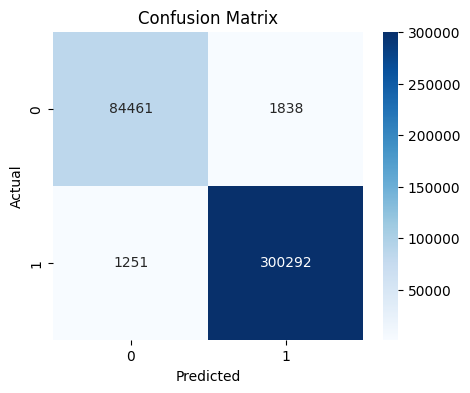

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


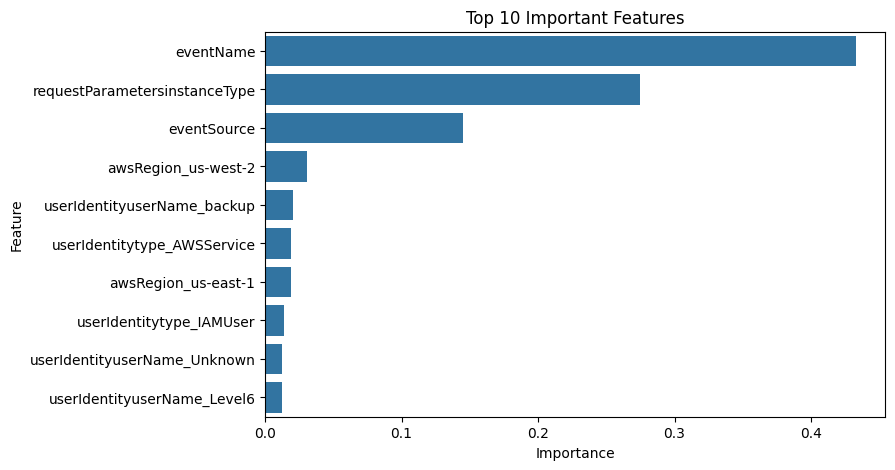

In [19]:
importances = rf.feature_importances_
features = X.columns

# Plot top 10 features
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Top 10 Important Features")
plt.show()


**checking for any outlayers **

In [20]:
import numpy as np

# Check numeric columns (Label Encoded ones)
numeric_cols = X.select_dtypes(include=['int', 'float']).columns

# Describe stats
X[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
eventName,1939207.0,968.576294,391.035368,0.0,666.0,1211.0,1211.0,1241.0
eventSource,1939207.0,63.088681,28.490108,0.0,52.0,52.0,52.0,163.0
requestParametersinstanceType,1939207.0,57.575968,55.996478,0.0,0.0,50.0,106.0,170.0


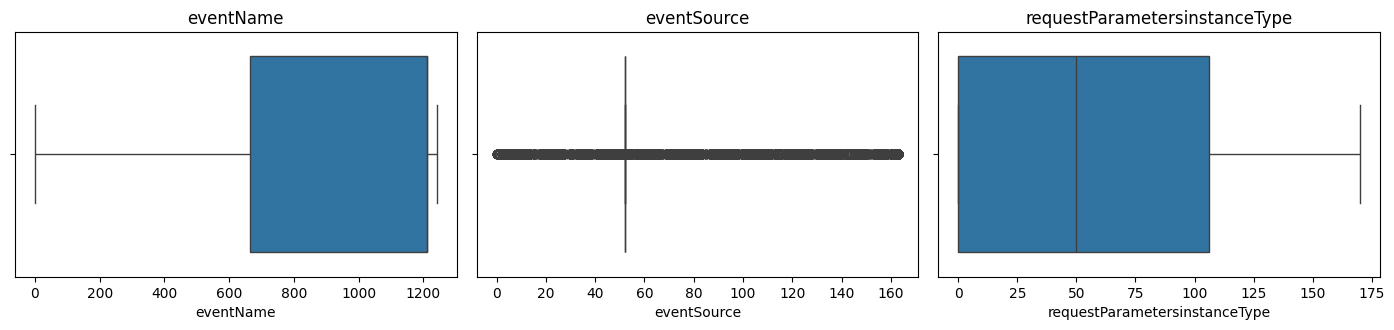

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for top few encoded features
plt.figure(figsize=(14, 6))
for i, col in enumerate(numeric_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=X[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [22]:
print("Total duplicates:", df.duplicated().sum())


Total duplicates: 1920429


In [23]:
df_clean = df.drop_duplicates()
print("New shape after removing duplicates:", df_clean.shape)


New shape after removing duplicates: (18778, 35)


**re-train/test spletting **

In [24]:
# Split features and labels from cleaned dataset
X = df_clean.drop('label', axis=1)
y = df_clean['label']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)


Training size: (15022, 34)
Test size: (3756, 34)


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1313
           1       0.88      0.90      0.89      2443

    accuracy                           0.85      3756
   macro avg       0.84      0.84      0.84      3756
weighted avg       0.85      0.85      0.85      3756



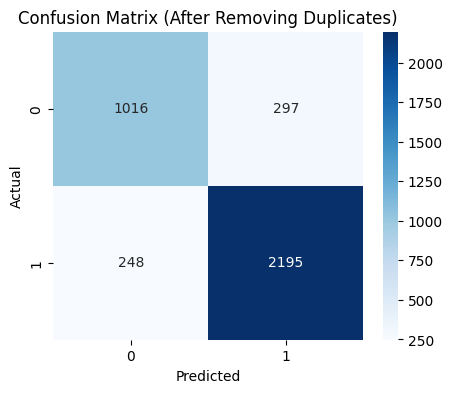

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = rf.predict(X_test)

# Metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (After Removing Duplicates)")
plt.show()


**Increaing scores of random forest**

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# Evaluate on test set
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1313
           1       0.91      0.92      0.91      2443

    accuracy                           0.89      3756
   macro avg       0.88      0.87      0.88      3756
weighted avg       0.89      0.89      0.89      3756



**XGBoost**

In [35]:
!pip install xgboost


In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [37]:
# Drop the label column
X = df_clean.drop('label', axis=1)
y = df_clean['label']

# Split into train and test sets (same ratio as before)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [38]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1313
           1       0.93      0.93      0.93      2443

    accuracy                           0.91      3756
   macro avg       0.90      0.91      0.90      3756
weighted avg       0.91      0.91      0.91      3756



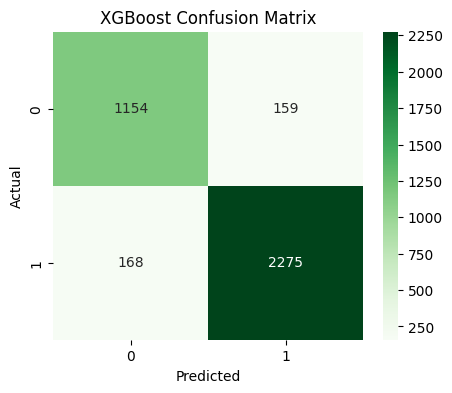

In [39]:
y_pred = xgb_clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


**DNN**

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler


In [41]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,233 (59.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [43]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7320 - loss: 0.5355 - val_accuracy: 0.8306 - val_loss: 0.3551
Epoch 2/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8167 - loss: 0.3880 - val_accuracy: 0.8349 - val_loss: 0.3494
Epoch 3/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8215 - loss: 0.3781 - val_accuracy: 0.8416 - val_loss: 0.3440
Epoch 4/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8416 - loss: 0.3384 - val_accuracy: 0.8366 - val_loss: 0.3424
Epoch 5/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8373 - loss: 0.3466 - val_accuracy: 0.8386 - val_loss: 0.3379
Epoch 6/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8421 - loss: 0.3416 - val_accuracy: 0.8376 - val_loss: 0.3357
Epoch 7/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8495 - loss: 0.3382 - val_accuracy: 0.8449 - val_loss: 0.3334
Epoch 8/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8403 - loss: 0.3370 - val_accu

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1313
           1       0.90      0.90      0.90      2443

    accuracy                           0.87      3756
   macro avg       0.86      0.86      0.86      3756
weighted avg       0.87      0.87      0.87      3756



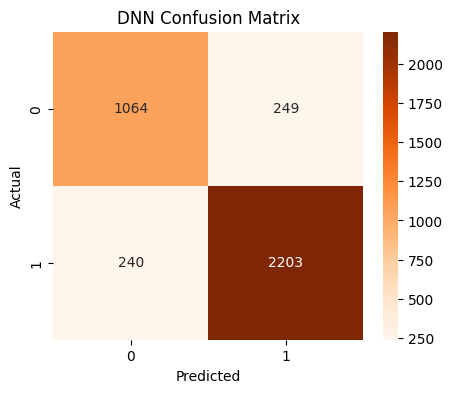

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

# Flatten for evaluation
y_pred = y_pred.flatten()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DNN Confusion Matrix")
plt.show()


**Improving DNN**

In [45]:
from tensorflow.keras import regularizers

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,233 (59.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [46]:
# Class weights: handle slight imbalance
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(weights))
print("Class Weights:", class_weights)

# Learning rate scheduler (optional)
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Class Weights: {0: np.float64(1.4303942106265473), 1: np.float64(0.7687033057005425)}


In [47]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop, lr_schedule],
    verbose=1
)


Epoch 1/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6223 - auc: 0.7090 - loss: 0.7945 - val_accuracy: 0.8176 - val_auc: 0.9065 - val_loss: 0.5041 - learning_rate: 5.0000e-04
Epoch 2/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7981 - auc: 0.8857 - loss: 0.5460 - val_accuracy: 0.8196 - val_auc: 0.9124 - val_loss: 0.4807 - learning_rate: 5.0000e-04
Epoch 3/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8129 - auc: 0.8993 - loss: 0.5089 - val_accuracy: 0.8160 - val_auc: 0.9154 - val_loss: 0.4704 - learning_rate: 5.0000e-04
Epoch 4/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8164 - auc: 0.9035 - loss: 0.4938 - val_accuracy: 0.8173 - val_auc: 0.9172 - val_loss: 0.4608 - learning_rate: 5.0000e-04
Epoch 5/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8132 - auc: 0.9102 - loss: 0.4705 - val_accuracy: 0.8130 - val_auc: 0.9185 - val_loss: 0.4512 - learning_rate: 5.0000e-04
Epoch 6/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - 

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1313
           1       0.97      0.82      0.89      2443

    accuracy                           0.86      3756
   macro avg       0.85      0.88      0.86      3756
weighted avg       0.89      0.86      0.87      3756



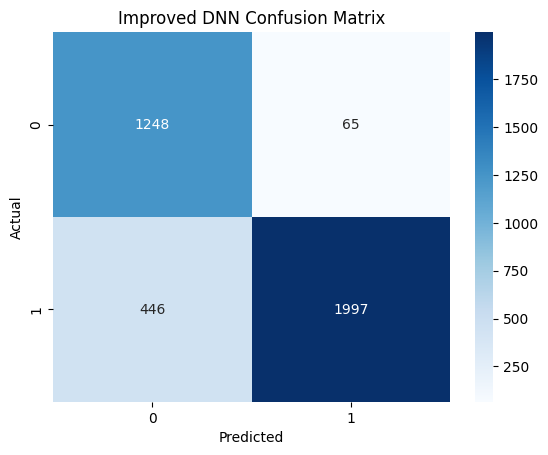

In [48]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Improved DNN Confusion Matrix")
plt.show()


**AutoEncoder**

In [49]:
# Keep only class 0 data for training
X_train_ae = X_train_scaled[y_train == 0]
print("Autoencoder Training Data Shape:", X_train_ae.shape)


Autoencoder Training Data Shape: (5251, 34)


In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_train_ae.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)

decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 34)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 34)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,642 (33.76 KB)

 Trainable params: 8,642 (33.76 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = autoencoder.fit(
    X_train_ae, X_train_ae,  # Train to reconstruct itself
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.3627 - val_loss: 1.8443
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1227 - val_loss: 1.7378
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0831 - val_loss: 1.7219
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8984 - val_loss: 1.7193
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0058 - val_loss: 1.7160
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1504 - val_loss: 1.7121
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9999 - val_loss: 1.7108
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1104 - val_loss: 1.7106
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2280 - val_loss: 1.7105
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0431 - val_loss: 1.7103
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1745 - val_loss: 1.7103
Epoch 12/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [52]:
# Get reconstruction error for test set
X_test_reconstructed = autoencoder.predict(X_test_scaled)
reconstruction_error = np.mean(np.power(X_test_scaled - X_test_reconstructed, 2), axis=1)


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


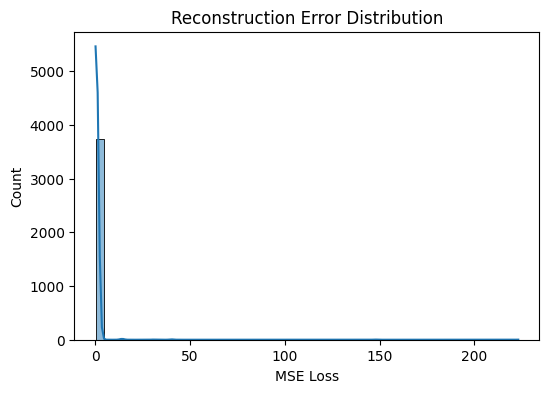

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize errors
plt.figure(figsize=(6, 4))
sns.histplot(reconstruction_error, bins=50, kde=True)
plt.title("Reconstruction Error Distribution")
plt.xlabel("MSE Loss")
plt.show()


In [54]:
threshold = np.percentile(reconstruction_error, 95)  # top 5% as anomalies
print("Threshold:", threshold)

# Predict anomalies
y_pred_ae = [1 if e > threshold else 0 for e in reconstruction_error]


Threshold: 0.8354623996310155


Autoencoder Classification Report:

              precision    recall  f1-score   support

           0       0.34      0.91      0.49      1313
           1       0.38      0.03      0.05      2443

    accuracy                           0.34      3756
   macro avg       0.36      0.47      0.27      3756
weighted avg       0.36      0.34      0.21      3756



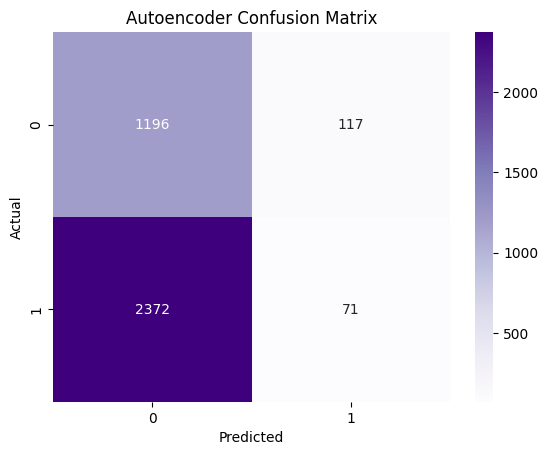

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

print("Autoencoder Classification Report:\n")
print(classification_report(y_test, y_pred_ae))

cm = confusion_matrix(y_test, y_pred_ae)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Autoencoder Confusion Matrix")
plt.show()


In [56]:
# Predict again
reconstructions = autoencoder.predict(X_test_scaled)

# Use both MSE and MAE to calculate errors
from sklearn.metrics import mean_absolute_error

mae = np.mean(np.abs(X_test_scaled - reconstructions), axis=1)
mse = np.mean(np.square(X_test_scaled - reconstructions), axis=1)

# Combine (optional)
recon_error = (mae + mse) / 2


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


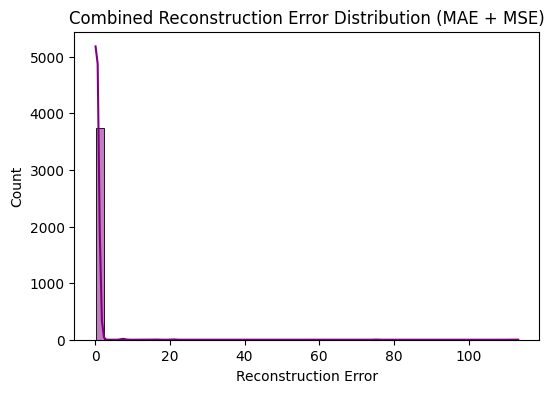

In [57]:
plt.figure(figsize=(6, 4))
sns.histplot(recon_error, bins=50, kde=True, color='purple')
plt.title("Combined Reconstruction Error Distribution (MAE + MSE)")
plt.xlabel("Reconstruction Error")
plt.show()


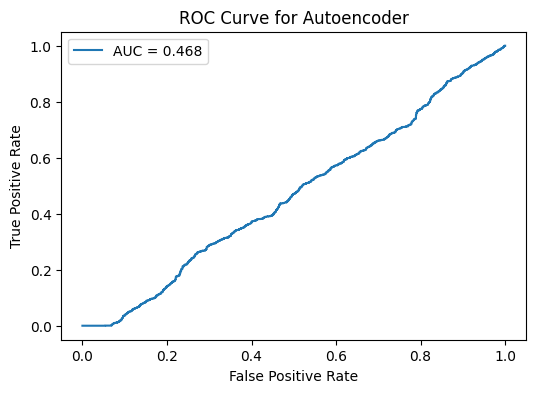

Best threshold based on ROC: 0.20766925565257596


In [58]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, recon_error)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Autoencoder")
plt.legend()
plt.show()

# Choose best threshold (You can also use Youden’s J statistic)
best_index = np.argmax(tpr - fpr)
best_threshold = thresholds[best_index]
print("Best threshold based on ROC:", best_threshold)


Autoencoder (Improved) Classification Report:

              precision    recall  f1-score   support

           0       0.37      0.14      0.20      1313
           1       0.65      0.87      0.75      2443

    accuracy                           0.62      3756
   macro avg       0.51      0.50      0.47      3756
weighted avg       0.55      0.62      0.56      3756



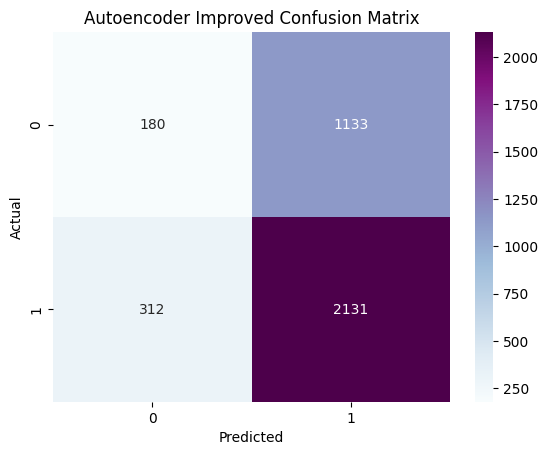

In [59]:
# Classify
y_pred_opt = [1 if e > best_threshold else 0 for e in recon_error]

# Report
print("Autoencoder (Improved) Classification Report:\n")
print(classification_report(y_test, y_pred_opt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_opt)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Autoencoder Improved Confusion Matrix")
plt.show()


**Rebuilding AutoEncoder**

In [60]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

input_dim = X_train_ae.shape[1]
input_layer = Input(shape=(input_dim,))

# Encoder
x = Dense(128, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

encoded = Dense(32, activation='relu')(x)

# Decoder
x = Dense(64, activation='relu')(encoded)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

output_layer = Dense(input_dim, activation='linear')(x)  # Use linear for raw output

deep_autoencoder = Model(inputs=input_layer, outputs=output_layer)
deep_autoencoder.compile(optimizer='adam', loss='mse')
deep_autoencoder.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 34)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 34)             │         4,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,402 (118.76 KB)

 Trainable params: 30,018 (117.26 KB)

 Non-trainable params: 384 (1.50 KB)

In [61]:
history = deep_autoencoder.fit(
    X_train_ae, X_train_ae,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.4649 - val_loss: 1.8443
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5011 - val_loss: 1.5908
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1325 - val_loss: 1.4525
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7903 - val_loss: 1.4456
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6649 - val_loss: 1.3851
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9823 - val_loss: 1.3556
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0988 - val_loss: 1.3022
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6604 - val_loss: 1.3985
Epoch 9/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7456 - val_loss: 1.2884
Epoch 10/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5730 - val_loss: 1.2983
Epoch 11/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6802 - val_loss: 1.2493
Epoch 12/100
132/132 ━━━━━━━━━━━━━━━━━━━

In [62]:
reconstructed = deep_autoencoder.predict(X_test_scaled)
recon_error = np.mean(np.square(X_test_scaled - reconstructed), axis=1)



118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [63]:
from sklearn.metrics import f1_score

best_f1 = 0
best_thresh = 0

# Try multiple thresholds
for t in np.linspace(min(recon_error), max(recon_error), 100):
    preds = (recon_error > t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print("Best threshold by F1:", best_thresh)


Best threshold by F1: 0.0029185617389000432


Improved Deep Autoencoder Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1313
           1       0.65      1.00      0.79      2443

    accuracy                           0.65      3756
   macro avg       0.33      0.50      0.39      3756
weighted avg       0.42      0.65      0.51      3756



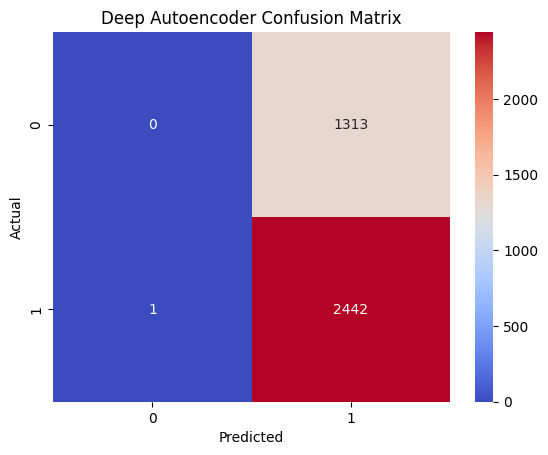

In [64]:
y_pred_ae = (recon_error > best_thresh).astype(int)

print("Improved Deep Autoencoder Classification Report:\n")
print(classification_report(y_test, y_pred_ae))

cm = confusion_matrix(y_test, y_pred_ae)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Deep Autoencoder Confusion Matrix")
plt.show()


In [65]:
from sklearn.metrics import f1_score, precision_score, recall_score

best_f1 = 0
best_thresh = 0

# Search in higher thresholds only
thresholds = np.linspace(np.percentile(recon_error, 80), np.percentile(recon_error, 99), 100)

for t in thresholds:
    preds = (recon_error > t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print("📌 Adjusted Threshold (high precision):", best_thresh)


📌 Adjusted Threshold (high precision): 0.3125486279555087


In [66]:
final_preds = (recon_error > best_thresh).astype(int)
print(classification_report(y_test, final_preds))


              precision    recall  f1-score   support

           0       0.43      0.98      0.60      1313
           1       0.97      0.30      0.46      2443

    accuracy                           0.54      3756
   macro avg       0.70      0.64      0.53      3756
weighted avg       0.78      0.54      0.51      3756



In [67]:
best_f1 = 0
best_thresh = 0
best_report = ""

for t in np.linspace(np.percentile(recon_error, 85), np.percentile(recon_error, 98), 50):
    preds = (recon_error > t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t
        from sklearn.metrics import classification_report
        best_report = classification_report(y_test, preds)

print(f"📌 Best Balanced Threshold: {best_thresh}")
print(best_report)


📌 Best Balanced Threshold: 0.3521184027427042
              precision    recall  f1-score   support

           0       0.41      0.99      0.58      1313
           1       0.97      0.22      0.37      2443

    accuracy                           0.49      3756
   macro avg       0.69      0.61      0.47      3756
weighted avg       0.78      0.49      0.44      3756



**V.3 Autoencoder**

In [68]:
import tensorflow.keras.backend as K
import tensorflow as tf

def hybrid_loss(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred), axis=-1)
    cosine = tf.keras.losses.cosine_similarity(y_true, y_pred, axis=-1)
    return mse + 0.1 * cosine  # You can tune this 0.1 weight


In [69]:
deep_autoencoder.compile(optimizer='adam', loss=hybrid_loss)

history = deep_autoencoder.fit(
    X_train_ae, X_train_ae,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3227 - val_loss: 1.1507
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2281 - val_loss: 1.0413
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2436 - val_loss: 1.4042
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2028 - val_loss: 1.7641
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2555 - val_loss: 1.3274
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1604 - val_loss: 1.8580
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1196 - val_loss: 2.2193
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1519 - val_loss: 2.2884
Epoch 9/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3977 - val_loss: 2.5633
Epoch 10/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1997 - val_loss: 1.4956
Epoch 11/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2184 - val_loss: 1.3768
Epoch 12/100
132/132 ━━━━━━━━━━━━━━━━━━━

In [71]:
# MSE per row
mse = np.mean(np.square(X_test_scaled - reconstructions), axis=1)

# Cosine similarity loss returns negative cosine similarity
cosine_sim = -tf.keras.losses.cosine_similarity(X_test_scaled, reconstructions).numpy()

# Combine hybrid error (weighted sum)
recon_error = mse + 0.1 * cosine_sim



✅ Best Threshold after Hybrid Loss: 0.4016092007136981
              precision    recall  f1-score   support

           0       0.41      0.99      0.58      1313
           1       0.98      0.23      0.37      2443

    accuracy                           0.49      3756
   macro avg       0.69      0.61      0.47      3756
weighted avg       0.78      0.49      0.44      3756



<Axes: >

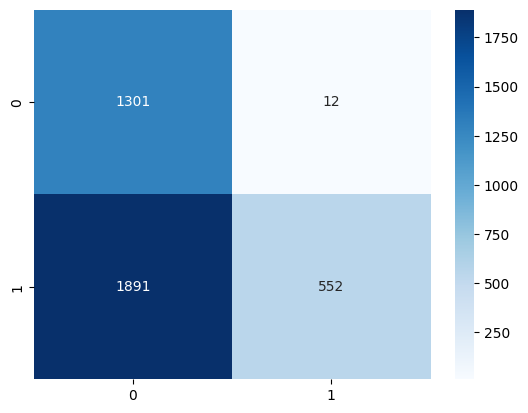

In [72]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

best_f1 = 0
best_thresh = 0

for t in np.linspace(np.percentile(recon_error, 85), np.percentile(recon_error, 99), 50):
    preds = (recon_error > t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print("✅ Best Threshold after Hybrid Loss:", best_thresh)

final_preds = (recon_error > best_thresh).astype(int)
print(classification_report(y_test, final_preds))

sns.heatmap(confusion_matrix(y_test, final_preds), annot=True, fmt='d', cmap='Blues')


**AE+DNN**

In [92]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_train_scaled.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded_output = Dense(16, activation='relu')(encoded)

# Decoder (not needed for classification, but complete AE structure)
decoded = Dense(32, activation='relu')(encoded_output)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, output_layer)
encoder = Model(input_layer, encoded_output)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.8283 - val_loss: 0.6026
Epoch 2/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2866 - val_loss: 0.6554
Epoch 3/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2513 - val_loss: 0.4382
Epoch 4/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1455 - val_loss: 0.4397
Epoch 5/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1843 - val_loss: 0.3981
Epoch 6/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1459 - val_loss: 0.3994
Epoch 7/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1162 - val_loss: 0.3802
Epoch 8/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1211 - val_loss: 0.3853
Epoch 9/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0716 - val_loss: 0.3791
Epoch 10/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0788 - val_loss: 0.3722
Epoch 11/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0500 - val_loss: 0.3684
Epoch 12/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [93]:
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)


470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_dnn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dnn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy', metrics=['accuracy'])

model_dnn.fit(X_train_encoded, y_train,
              validation_data=(X_test_encoded, y_test),
              epochs=50, batch_size=32)


Epoch 1/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6390 - loss: 0.6648 - val_accuracy: 0.7990 - val_loss: 0.4527
Epoch 2/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7743 - loss: 0.4763 - val_accuracy: 0.8259 - val_loss: 0.4008
Epoch 3/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8001 - loss: 0.4377 - val_accuracy: 0.8259 - val_loss: 0.3665
Epoch 4/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8070 - loss: 0.4089 - val_accuracy: 0.8379 - val_loss: 0.3599
Epoch 5/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8278 - loss: 0.3834 - val_accuracy: 0.8323 - val_loss: 0.3528
Epoch 6/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8250 - loss: 0.3847 - val_accuracy: 0.8387 - val_loss: 0.3404
Epoch 7/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8274 - loss: 0.3752 - val_accuracy: 0.8301 - val_loss: 0.3529
Epoch 8/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8295 - loss: 0.3738 - val_accuracy: 0.

In [95]:
from sklearn.metrics import classification_report

pred_probs = model_dnn.predict(X_test_encoded)
final_preds = (pred_probs > 0.5).astype(int)

print(classification_report(y_test, final_preds))


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1313
           1       0.89      0.89      0.89      2443

    accuracy                           0.85      3756
   macro avg       0.84      0.84      0.84      3756
weighted avg       0.85      0.85      0.85      3756



**Performance Matrix**

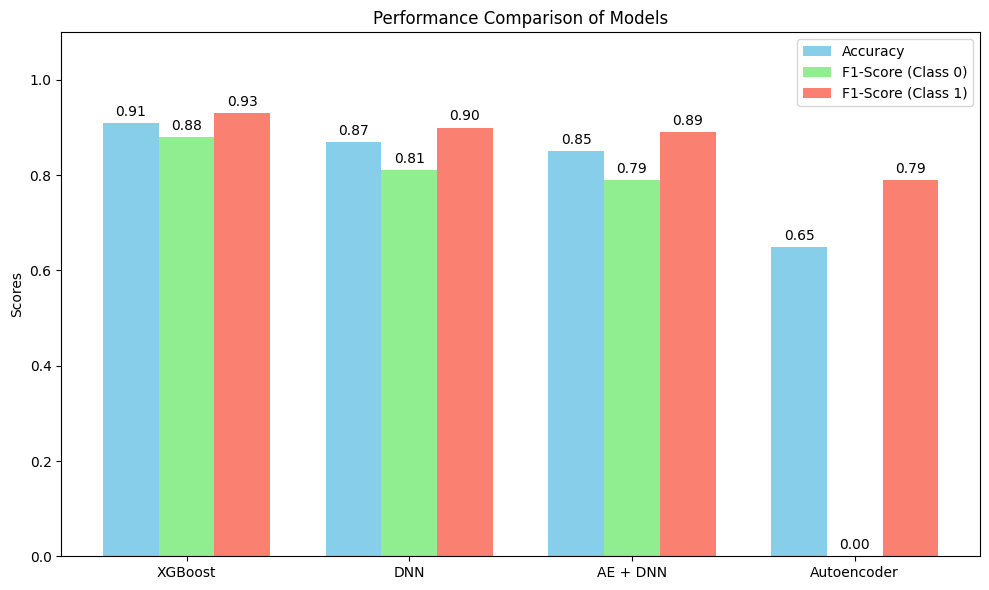

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
models = ['XGBoost', 'DNN', 'AE + DNN', 'Autoencoder']

# Define metrics: Accuracy, F1-Score (Class 0), F1-Score (Class 1)
accuracy = [0.91, 0.87, 0.85, 0.65]
f1_class_0 = [0.88, 0.81, 0.79, 0.00]
f1_class_1 = [0.93, 0.90, 0.89, 0.79]

# Bar positions
x = np.arange(len(models))
width = 0.25  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for each metric
bars1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x, f1_class_0, width, label='F1-Score (Class 0)', color='lightgreen')
bars3 = ax.bar(x + width, f1_class_1, width, label='F1-Score (Class 1)', color='salmon')

# Add labels and title
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.legend()

# Add values on top of bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
